# Computational Astrophysics
## 03.  Composite FITS images 01
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

### About this notebook

In this worksheet we use the `astropy` package to read a set of .fits files and visualize a composite version of an astronomical image.

---

## The .FITS data

We will use a set of four .fits images of galaxy M31 obtained from the SIMBAD Database. Go to

http://cdsportal.u-strasbg.fr/?target=andromeda

In the Tabular Data section, click on the VizieR images tab and download the images

m31_sdss_obs_flux_attcorr_nomask_i.fit \
m31_sdss_obs_flux_attcorr_nomask_r.fit \
m31_sdss_obs_flux_attcorr_nomask_g.fit \
m31_sdss_obs_flux_attcorr_nomask_u.fit 

which correspond to three photometric images with the filters i, r, g and u.

For a detalied description of working with .fits files using `astropy`, go to

http://docs.astropy.org/en/stable/io/fits/index.html

https://docs.astropy.org/en/stable/visualization/rgb.html

---

### Reading the .fits files

We open the files and read the data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

In [2]:
hduli = fits.open('m31_sdss_obs_flux_attcorr_nomask_i.fit')
hdulr = fits.open('m31_sdss_obs_flux_attcorr_nomask_r.fit')
hdulg = fits.open('m31_sdss_obs_flux_attcorr_nomask_g.fit')
hdulu = fits.open('m31_sdss_obs_flux_attcorr_nomask_u.fit')

In [3]:
i = hduli[0].data
r = hdulr[0].data
g = hdulg[0].data
u = hdulu[0].data

### Visualizing the Image

We use the function `make_lupton_rgb` from the `astropy` package to create the composite rgb image using the above data. More information on this function at

https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html#

In [4]:
rgb_default = make_lupton_rgb(i, r, g)

Now, we will use the `matplotlib.pyplot` function `imshow` to visualize the data in the fits file. For detailed information go to

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html

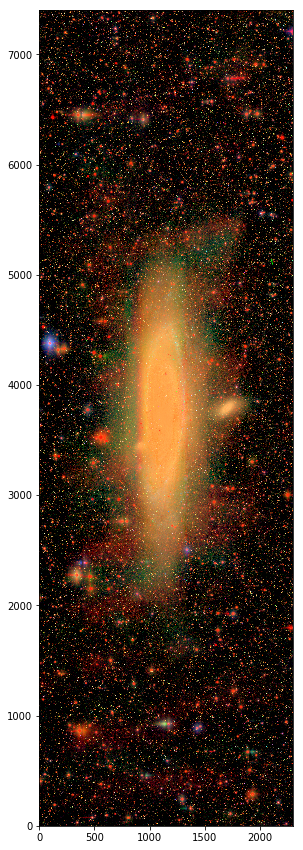

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(rgb_default, origin='lower')
plt.show()

The image can be improved by changing some parameters of the `make_lupton_rgb` function such as the minimum, the stretch and the $Q$ factor.

Changing minimum will change the black level, while stretch and Q will change how the values between black and white are scaled.

Defaults: \
minimum = 0.\
stretch= 5.  (The linear stretch of the image)\
Q = 8 (The asinh softening parameter)

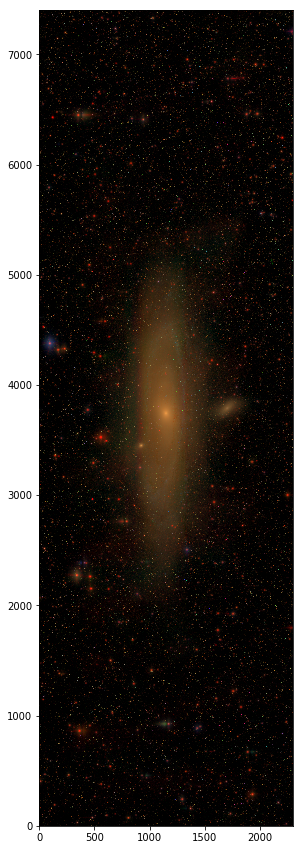

In [9]:
rgb_default = make_lupton_rgb(i, r, g,  stretch=40, Q=20)

plt.figure(figsize=(15,15))
plt.imshow(rgb_default, origin='lower')
plt.show()

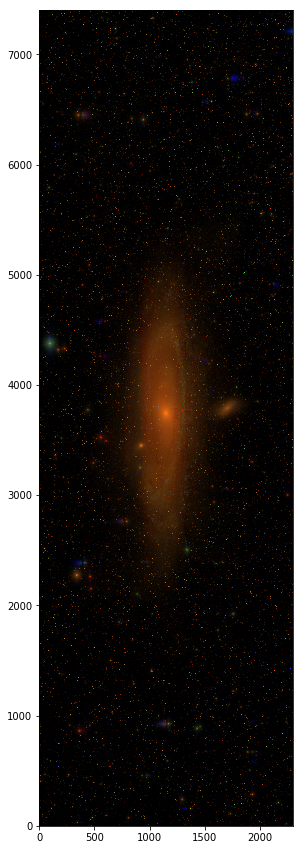

In [10]:
rgb_2 = make_lupton_rgb(r, g, u, stretch=50, Q=20)

plt.figure(figsize=(15,15))
plt.imshow(rgb_2, origin='lower')
plt.show()